<a href="https://colab.research.google.com/github/Emre20202/The-Room-of-Requirement/blob/main/EE374_Emre_Cifci.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Emre Cifci AnalogToDigital Project**

>**Task 1: Pulse Code Modulation**

First, we need to import Python libraries.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Then, we need to define sampling frequency and the signal duration as well as the sampled time array. This array provides us to work at a sampled time sequence starting from t=Ts.

In [ ]:
sampling_freq=200 #Hz (fm=100 Hz-> fnyquist=200Hz)
signal_duration=2 #s
time=np.arange(sampling_freq*signal_duration)/sampling_freq

The following function will be used to convert integers to binary values.

In [ ]:
def int2bin(integer, num_of_digits):
    if integer >= 0:
        return bin(integer)[2:].zfill(num_of_digits)

Here, we define the message signal and plot it for a limited interval. (This makes it possible for us to see it in detail.)

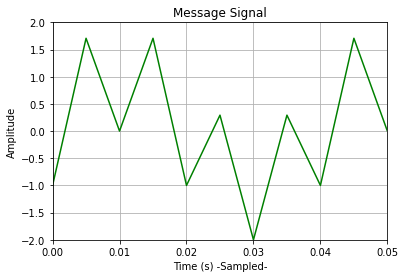

In [ ]:
message=-np.cos(200*np.pi*time)+np.sin(50*np.pi*time)
plt.plot(time,message,'g')
plt.axis([0,0.05,-2,2])
plt.xlabel('Time (s) -Sampled-')
plt.ylabel('Amplitude')
plt.title('Message Signal')
plt.grid(True)

We need to define the number of quantization levels and the number of bits must be used to represent the quantization levels. # of bits is found using a logarithmic function and this makes the code be able to work with different # of quantization levels without a need of changing more than a variable. Then, we should find the maximum and minimum of the message signal and divide it to the # of quantization levels so that we can find the difference between two neighbour quantization levels. To find the quantization levels, we need to find the difference between the message signal and the quantization levels. If this difference is between 0 and delta_v/2, this means that we have the nearest quantization level to our message signal at this time instant. Since we have to start counting the quantization levels from the top (as the project report stated), we find their binary representation accordingly. We plot it for near to t=Ts and try to see some of the quantization levels.

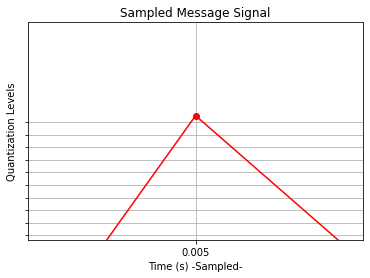

In [ ]:
num_of_quant_level=128
num_of_bits=int(np.log2(num_of_quant_level))
max_of_message=max(message)
min_of_message=min(message)
diff=abs(max_of_message-min_of_message)
delta_v=diff/(num_of_quant_level)
quantized_message=np.zeros_like(message)
quantized_message_binary=['']*time.size

for i,t in enumerate(time):
  for j in range(0,num_of_quant_level):
    quantization_level=min_of_message+(j+0.5)*delta_v
    difference=abs(quantization_level-message[i])
    if difference<=(delta_v/2):
      quantized_message[i]=quantization_level
      quantized_message_binary[i]=int2bin(num_of_quant_level-j-1,num_of_bits)
      break

fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(time,quantized_message,'ro-')
grid_points=np.arange(min_of_message,max_of_message,delta_v)
ax.yaxis.set_ticks(grid_points)
ax.set_yticklabels([])
ax.xaxis.set_ticks(time)
ax.grid(True)
ax.axis([1/sampling_freq-0.001,1/sampling_freq+0.001,max_of_message-0.3,max_of_message+0.2])
plt.xlabel('Time (s) -Sampled-')
plt.ylabel('Quantization Levels')
plt.title('Sampled Message Signal')
plt.show()

Now, we print the corresponding quantization levels in their binary representations starting from the top (quantization level at the top is 0) and starting from t=Ts.

In [ ]:
print('"',end="",sep="")
for i in range(1,11):
  print(quantized_message_binary[i],end="",sep="")
  if i!=10:
    print("-",end="",sep="")
print('"')

"0000000-0111010-0000000-1011101-0110000-1111111-0110000-1011101-0000000-0111010"


>**Task 2: Delta Modulation**

First of all, we need to check whether delta_step=0.2 can be used in delta modulation. For this, we need to find the maximum of the derivative of the message signal and divide it by our new sampling frequency. Here, we plot the derivative of the message signal and print the minimum delta_step value(epsilon) to be able to catch the signal. This value is found to be 0.9670224478105688 which is >> 0.2. Thus, we suggest using this value instead of using 0.2. However, this value can be changed easily since it is a variable.

0.9670224478105688


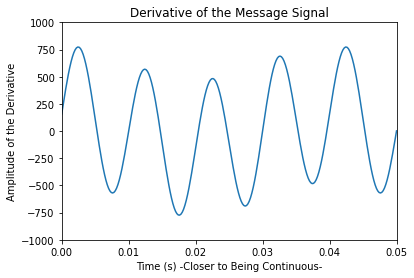

In [ ]:
def message_derivative(tt):
  return 50*np.pi*(4*np.sin(200*np.pi*tt)+np.cos(50*np.pi*tt))
fx=np.linspace(0,2,10000)
plt.plot(fx,message_derivative(fx))
plt.axis([0,0.05,-1000,1000])
plt.xlabel('Time (s) -Closer to Being Continuous-')
plt.ylabel('Amplitude of the Derivative')
plt.title('Derivative of the Message Signal')
max_of_derivative=max(message_derivative(fx))
epsilon=max_of_derivative/(4*sampling_freq)
print(epsilon)

In this part, we define the new message signal with four times the Nyquist sample rate. Increasing the Nyquist sample rate decreases the difference between message signal values at neighbour time instants and increases the correlation of the steps used in delta modulation but at the same time increases the bandwidth needed, just like a trade-off. Initially, we define the first quantized step to be zero. Then, we check whether the difference between the message signal at sample i and the quantized step at time sample i-1 is more than the half of the delta_step, less than the half of the delta_step or zero. If it is more than it, we need to continue with one delta_step incremented step, or if it is less than it, we need to continue with one delta_step decreased step, or we need to stay at our previous step. The holder array holds these actions as 1 or 0 s.t. 1 for increments, 0 for decreases. Since it needs to be shown in binary representation, staying at the same step cannot be represented properly e.g. if the previous step is incremented, this stable step is represented with 1. So, staying at the same step cannot be shown in this representation. 
Finally, we plot the the sampled steps with the sampled message signal for first 20 steps to see their correlation. It is obvious that delta_step=0.2 is not sufficient to catch the signal and comes out with an unsuccessful delta modulation.

Text(0.5, 1.0, 'Delta Modulation with delta_step=0.2 for first 20 samples')

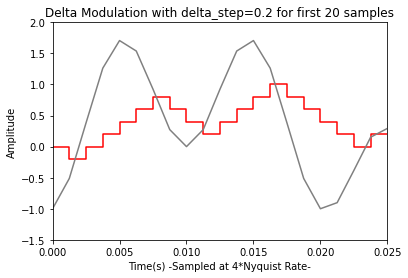

In [ ]:
delta_step=0.2
new_time=np.arange(4*sampling_freq*signal_duration)/(4*sampling_freq)
new_message=-np.cos(200*np.pi*new_time)+np.sin(50*np.pi*new_time)
quantized_new_message=np.zeros_like(new_message)
holder=np.zeros_like(new_message,dtype=int)
holder_of_binary=['']*new_time.size
#m(t)=0 corresponds to 0
j=0
for i,t in enumerate(new_time):
  if i==0:
    j=0
    quantized_new_message[0]=0
    holder[0]=0
    continue
  new_diff=new_message[i]-quantized_new_message[i-1]
  if new_diff==0 or abs(new_diff)<=(delta_step/2):
    quantized_new_message[i]=quantized_new_message[i-1]
  elif new_diff>0:
    quantized_new_message[i]=quantized_new_message[i-1]+delta_step
    j=1
  else:
    quantized_new_message[i]=quantized_new_message[i-1]-delta_step
    j=0
  holder[i]=j

for i,t in enumerate(new_time):
  holder_of_binary[i]=int2bin(holder[i],1)

plt.step(new_time,quantized_new_message,'red',where='post')
plt.plot(new_time,new_message,'grey')
plt.axis([0,20*new_time[1],-1.5,2])
plt.xlabel('Time(s) -Sampled at 4*Nyquist Rate-')
plt.ylabel('Amplitude')
plt.title('Delta Modulation with delta_step={} for first 20 samples'.format(delta_step))

First 20 steps are shown here with their binary representations.

In [ ]:
print("[",end="",sep="")
for i in range (1,21):
  print(holder_of_binary[i],end="",sep="")
  if i!=20:
    print("-",end="",sep="")
print("]")

[0-1-1-1-1-1-0-0-0-1-1-1-1-0-0-0-0-0-1-1]
